In [170]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [171]:
train_sizes = [10,50,100,500]

x_train = [np.random.uniform(0,2*np.pi, (1,size)) for size in train_sizes]
# this leaves x_train in a weird format, which is unpacked
x_train = [inner_list for outer_list in x_train for inner_list in outer_list]
y_train = [np.sin(x) for x in x_train]

x_test = np.array(range(1,629))/100
y_test = np.sin(x_test)

## Exercise 4a and b
train the neural network

plot the calculated functions

turns out that the approximation by the model trained with 500 points is pretty good.


In [172]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=()))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))


Epoch 1/100
10/10 [==============================] - 1s 4ms/step - loss: 0.5775 - accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3980 - accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3787 - accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3658 - accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3556 - accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3495 - accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3370 - accuracy: 0.0000e+00
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3252 - accuracy: 0.0000e+00
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3187 - accuracy: 0.0000e+00
Epoch 10/100
10/10 [==============================] - 0s 7ms/step - loss:

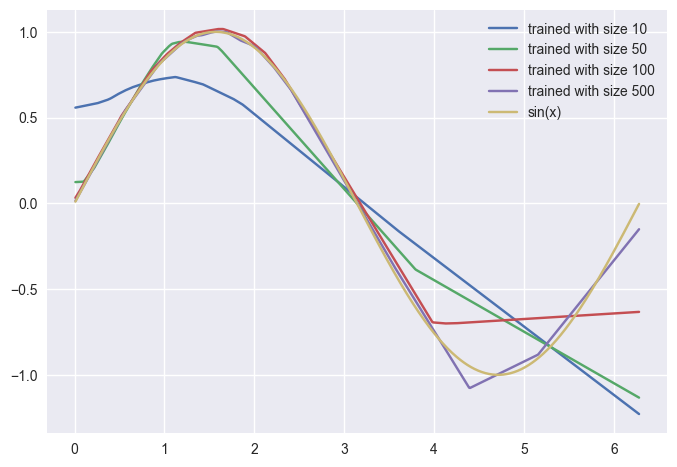

In [173]:
loss_fn = tf.keras.losses.MeanSquaredError()
legend = []
predictions = []
predict_31 = []

histories = []
for i in range(4):
    x = x_train[i]
    y = y_train[i]

    model.compile(loss = loss_fn, metrics = ['accuracy'], optimizer='adam')
    history = model.fit(x, y, epochs = 100, batch_size=int(np.ceil(train_sizes[i]/10)))
    histories.append(history)
    prediction = model.predict(np.array(x_test))
    plt.plot(x_test,prediction)
    legend.append(f"trained with size {train_sizes[i]}")
    predictions.append(prediction)
    predict_31.append(model.predict(np.array([31.4])))

plt.plot(x_test,y_test)
legend.append("sin(x)")
plt.legend(legend)


## Exercise 4c
calculate the loss. 

I don't quite understand the exercise, but I assume I have to calculate this loss for every x in the test-set.

This is being plotted below.

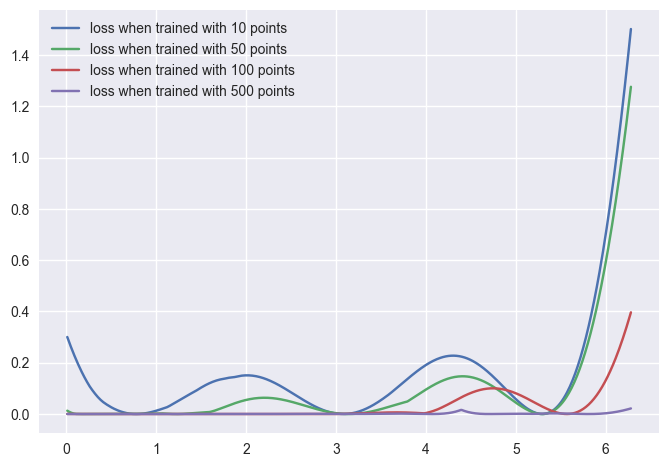

In [174]:
# every value in every sublist of predictions is wrapped in another list ...for some reason
# this has to be unpacked again :(

legend = []
for i,p in enumerate(predictions):
    p = [val[0] for val in p]
    loss = (y_test-p)**2
    plt.plot(x_test, loss)
    legend.append(f"loss when trained with {train_sizes[i]} points")
plt.legend(legend)
plt.show()

## Exercise 4d
evaluate at x = 31.4

In [175]:
print(f"actual value: {np.sin(31.4)}")
for i,val in enumerate(predict_31):
    p = val[0][0]
    print(f"value when trained with {train_sizes[i]} points: {p}")

actual value: -0.0159258626001018
value when trained with 10 points: -11.169960975646973
value when trained with 50 points: -8.675347328186035
value when trained with 100 points: 0.20122282207012177
value when trained with 500 points: 15.161251068115234


The neural network is a bad approximator for these points because the regularity of sin has not been established.